# Quantization #

Show:
- Uniform distribution and its probability distribution
- Gaussian distribution and its probability distribution


In [1]:
from __future__ import print_function, division
import os, sys
import time

module_path = os.path.abspath(os.path.join('..')) # append directory one level up to import path
if module_path not in sys.path:  # ... if it hasn't been appended already
    sys.path.append(module_path)

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline

import dsp_fpga_lib as dsp # import and set plot properties
import dsp_fpga_fix_lib as fx

import numpy as np
from numpy import sin, cos, tan, angle, pi, array, arange, log10, zeros, \
  linspace, ones, sqrt
from scipy.stats import norm
import scipy.signal as sig

plt.rcParams["figure.figsize"] = [15, 10]

Zunächst schauen wir uns zwei verschiedene Verteilungsdichtefunktionen an, normal- oder gaussverteilte Folgen und gleichverteilte Folgen.

Wenn man die Zufallsprozesse filtert, ändert sich in der Zeitebene wenig und in der Amplitudenverteilung gar nichts. Das Spektrum ist jetzt natürlich nicht mehr weiß:

D:\Programme\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


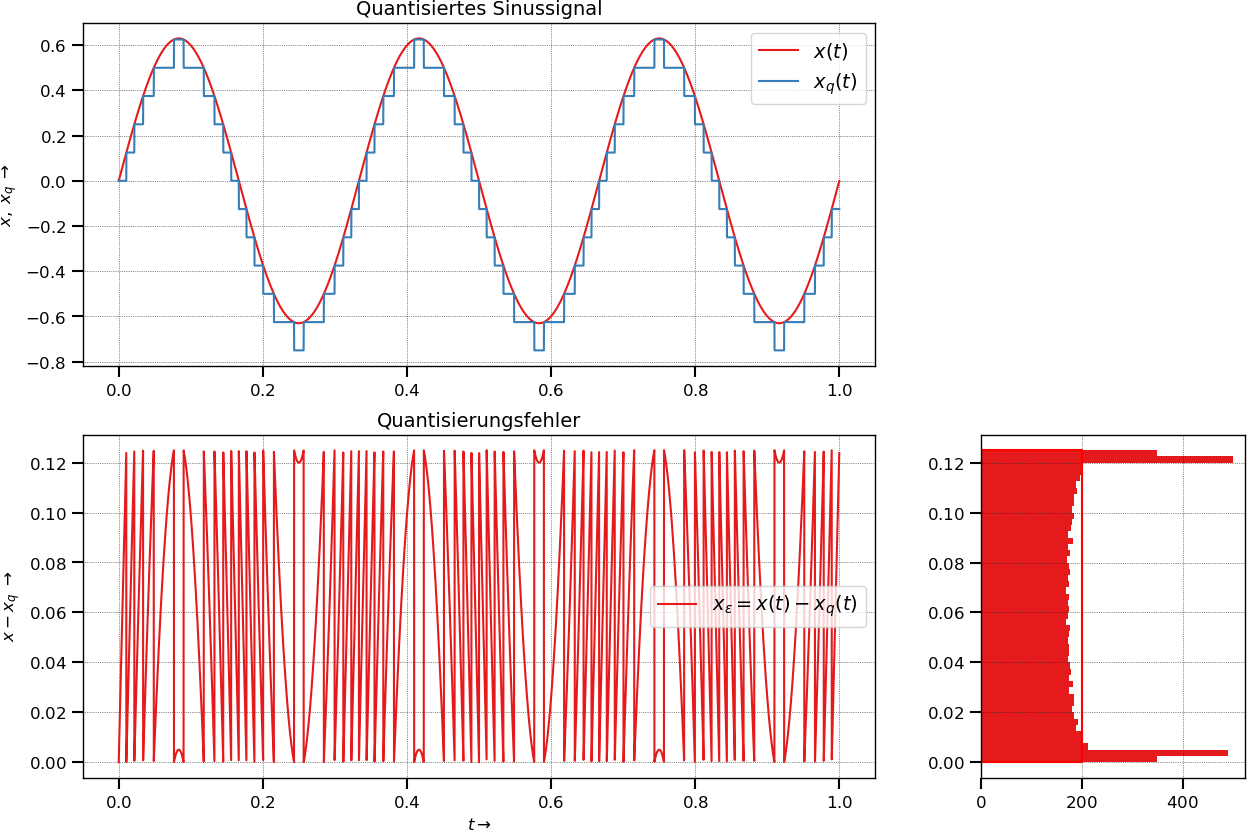

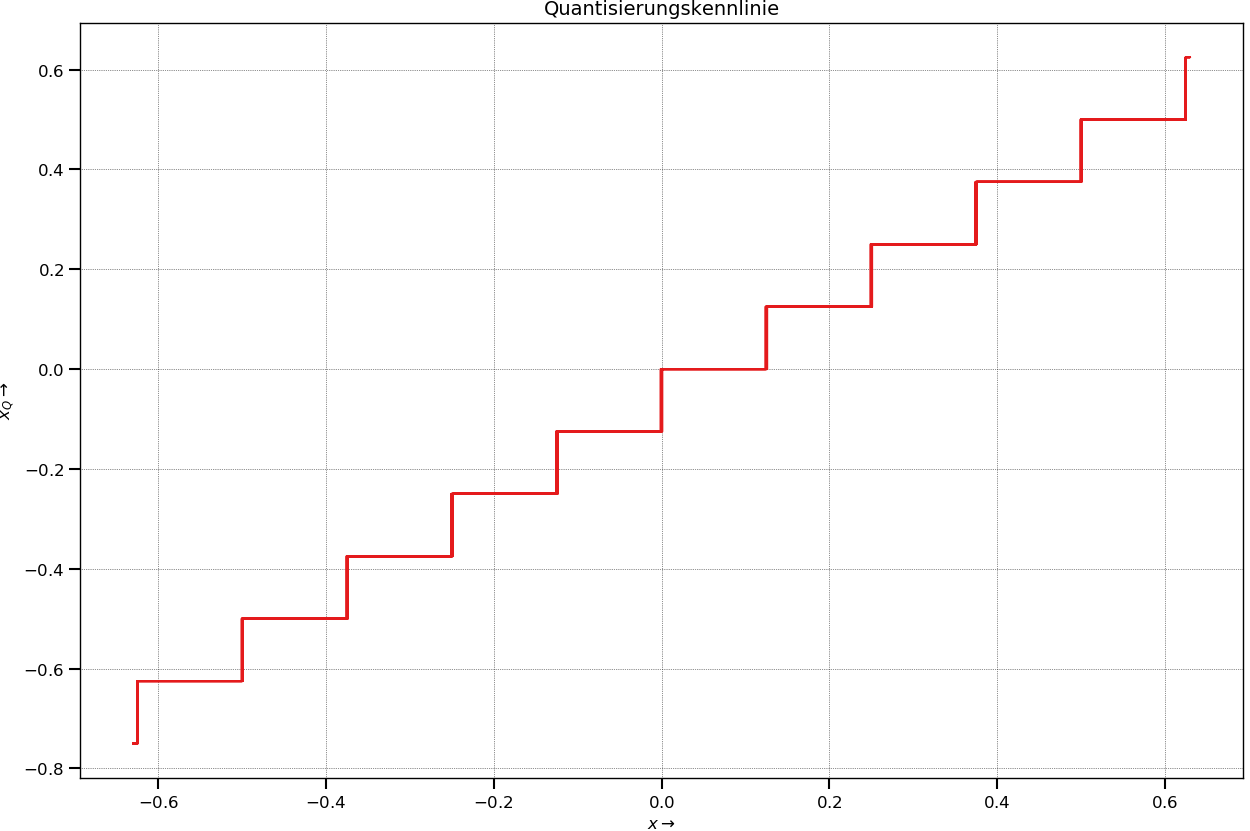

In [6]:
N = 10000
N_bins = 50
t = linspace(0, 1, N, endpoint=False)
x = sin(2*pi*t*3)*0.63
r = np.random.randn(N)

#q_obj = (0, 4, 'round', 'sat') # try 'round' ; 'sat'
q_obj = {'QI':1, 'QF': 3, 'quant':'floor', 'ovfl': 'wrap'} # try 'round' ; 'sat'
#q_obj = {'OVFL':'sat'}

fx_x = fx.Fixed(q_obj)

x_q = fx_x.fix(x) # quantize x
x_eps = x - x_q # quantization error
#
fig1 = plt.figure(1)
gs = gridspec.GridSpec(2, 2, width_ratios=[3, 1]) 
ax11 = plt.subplot(gs[0])
ax11.set_title('Quantisiertes Sinussignal')
ax11.plot(t, x, label = r'$x(t)$')
ax11.plot(t, x_q, label = r'$x_q(t)$')
ax11.legend(fontsize = 14)
#ax11.grid(True)
ax11.set_ylabel(r'$x, \;x_q \; \rightarrow$')
ax13 = plt.subplot(gs[2])
ax13.set_title('Quantisierungsfehler')
ax13.plot(t, x_eps, label = r'$x_{\epsilon} = x(t) - x_q(t)$')
ax13.set_ylabel(r'$x - x_q \; \rightarrow$')
ax13.legend(fontsize = 14)
ax13.set_xlabel(r'$t \rightarrow$');
ax14= plt.subplot(gs[3])
#ax14.plot(hist)
ax14.hist(x_eps, bins=N_bins, 
                       range=None, 
                       normed=False, 
                       weights=None, 
                       cumulative=False, 
                       bottom=None, 
                       histtype=u'bar', 
                       align=u'mid', 
                       orientation=u'horizontal', 
                       rwidth=None, 
                       log=False, 
                       color=None, 
                       label=None, 
                       stacked=False)
ax14.plot([0, N/50, N/50, 0],[0,0,fx_x.LSB,fx_x.LSB], 'r-')
#
fig2 = plt.figure(2)
ax21 = fig2.add_subplot(111)
ax21.set_title('Quantisierungskennlinie')
ax21.step(x,x_q, where = 'post')
ax21.set_xlabel(r'$x \rightarrow$')
ax21.set_ylabel(r'$x_Q \rightarrow$');
#plt.show()

<hr>
**Copyright**

(c) 2016 - 2018 Prof. Dr. Christian Münker 

This jupyter notebook is part of a collection of notebooks on various topics of Digital Signal Processing. The latest version can be found at https://github.com/chipmuenk/dsp_fpga "Digitale Signalverarbeitung auf FPGAs"

This notebook is provided as [Open Educational Resource](https://en.wikipedia.org/wiki/Open_educational_resources). Feel free to use the notebook for your own purposes. The text is licensed under [Creative Commons Attribution 4.0](https://creativecommons.org/licenses/by/4.0/), the code of the IPython examples under the [MIT license](https://opensource.org/licenses/MIT). Please attribute the work as follows: *Christian Münker, Digital Signal Processing auf FPGAs - Vorlesungsunterlagen mit Simulationsbeispielen, 2018*.